# Dimensionality reduction

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Requirements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import course.utils.paths as path

import sklearn

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA
from sklearn.manifold import MDS

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

sns.set_theme()

print(sklearn.__version__)

1.2.1


## Load dataset

In [3]:
heart_file = path.data_raw_dir('heart.csv')
heart_data = pd.read_csv(heart_file)

display(heart_data.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## Prepare data

In [4]:
X = heart_data.drop(['target'], axis=1)
y = heart_data['target']

sc = StandardScaler()
X_sc = sc.fit_transform(X)


## PCA

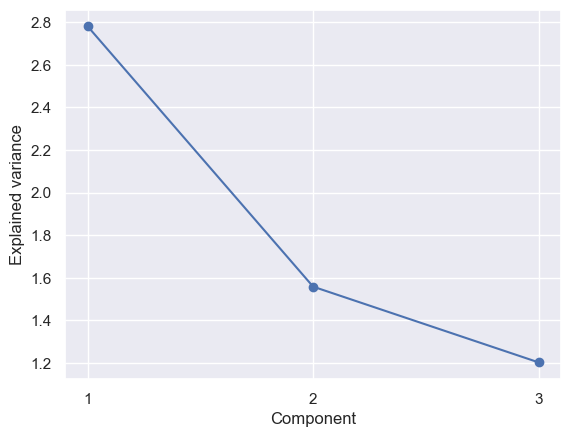

In [5]:
pca = PCA(n_components=3)
X_pc = pca.fit_transform(X_sc)

plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, 'o-')
plt.xticks(range(1, len(pca.explained_variance_) + 1), range(1, len(pca.explained_variance_) + 1))
plt.xlabel('Component')
plt.ylabel('Explained variance')
plt.show()

## Incremental PCA

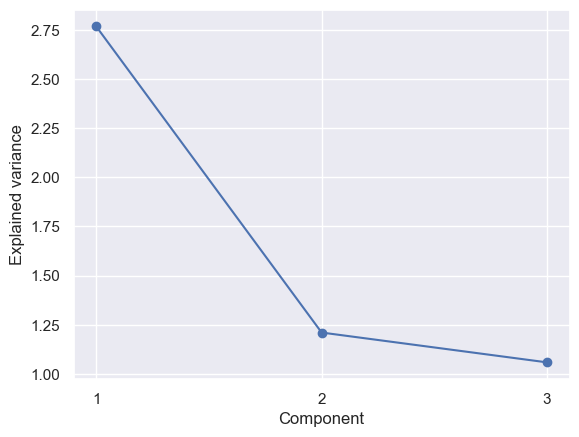

In [6]:
ipca = IncrementalPCA(n_components=3, batch_size=10)
X_ipc = ipca.fit_transform(X_sc)

plt.plot(range(1, len(ipca.explained_variance_) + 1), ipca.explained_variance_, 'o-')
plt.xticks(range(1, len(ipca.explained_variance_) + 1), range(1, len(ipca.explained_variance_) + 1))
plt.xlabel('Component')
plt.ylabel('Explained variance')
plt.show()

## Kernel PCA

In [7]:
# kpca = KernelPCA(n_components=3, kernel='poly')
kpca = KernelPCA(n_components=3, kernel='rbf')
X_kpc = kpca.fit_transform(X_sc)

## Multidimensional scaling

In [9]:
mds = MDS(n_components=3, normalized_stress='auto')
X_mds = mds.fit_transform(X_sc)

## Apply logistic regression

### PCA

In [10]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pc, y, test_size=0.3, random_state=123456)

estimator = LogisticRegression(solver='lbfgs')
estimator.fit(X_train, y_train)

print("Score for PCA:", estimator.score(X_test, y_test))

Score for PCA: 0.8181818181818182


### IPCA

In [11]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_ipc, y, test_size=0.3, random_state=123456)

estimator = LogisticRegression(solver='lbfgs')
estimator.fit(X_train, y_train)

print("Score for IPCA:", estimator.score(X_test, y_test))

Score for IPCA: 0.7954545454545454


### KPCA

In [12]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_kpc, y, test_size=0.3, random_state=123456)

estimator = LogisticRegression(solver='lbfgs')
estimator.fit(X_train, y_train)

print("Score for KPCA:", estimator.score(X_test, y_test))

Score for KPCA: 0.8441558441558441


### MDS

In [13]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_mds, y, test_size=0.3, random_state=123456)

estimator = LogisticRegression(solver='lbfgs')
estimator.fit(X_train, y_train)

print("Score for MDS:", estimator.score(X_test, y_test))

Score for MDS: 0.7987012987012987
